In [191]:
!pip install pandas scikit-learn matplotlib


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [192]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [193]:
local_dest_dir  = os.path.join(os.getcwd(), 'clean_datasets/')
output_file_path = local_dest_dir + 'edge-datalake-bullet-clean.json'
df              = pd.read_json(output_file_path)

In [194]:
#========================================================================================
# Print the contents of the dataframe
#========================================================================================
print(df)

                     ElapsedTime  TrainSpeed  TrainAcceleration  TrainBraking  \
0    2023-10-06T05:39:52.012591Z   78.116094          -0.597256             0   
1    2023-10-06T05:39:53.055930Z   79.116094           1.000000             0   
2    2023-10-06T05:39:54.098332Z   80.000000           1.000000             0   
3    2023-10-06T05:39:55.140907Z   79.160007          -0.839993             0   
4    2023-10-06T05:39:56.185652Z   80.000000           1.000000             0   
..                           ...         ...                ...           ...   
295  2023-10-06T05:36:17.490079Z   78.663242          -0.171617             0   
296  2023-10-06T05:36:18.545900Z   77.786676          -0.876566             0   
297  2023-10-06T05:36:19.590217Z   78.143449           0.356773             0   
298  2023-10-06T05:36:20.632565Z   78.453075           0.309626             0   
299  2023-10-06T05:36:21.674950Z   78.166765          -0.286309             0   

     OutsideTemperature  Hu

In [195]:
#========================================================================================
# Print the contents of the dataframe
#========================================================================================
print(df.TrainTonnage)

0      1081.915002
1      1081.915002
2      1081.915002
3      1081.915002
4      1081.915002
          ...     
295     878.031100
296     878.031100
297     878.031100
298     878.031100
299     878.031100
Name: TrainTonnage, Length: 300, dtype: float64


In [196]:
# Split the dataset into training and test sets
# Prepare the data
X = df[['TrainTonnage']]
y = df['TrainTonnage']


In [197]:
# Instantiate the random forest regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [198]:
# Fit the model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [199]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [200]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error

In [201]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.0


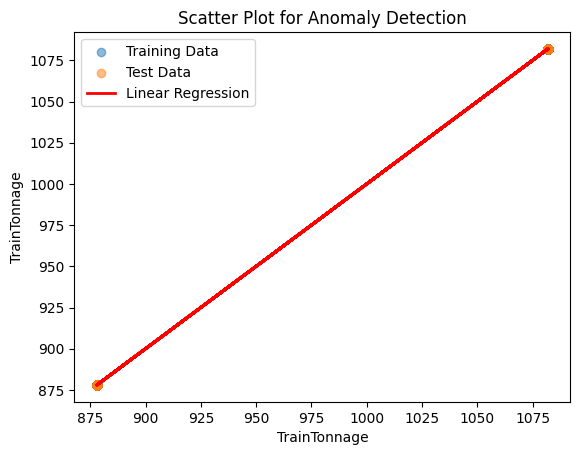

In [202]:
# Create a scatter plot of the data
plt.scatter(X_train, y_train, label='Training Data', alpha=0.5)
plt.scatter(X_test, y_test, label='Test Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('TrainTonnage')
plt.ylabel('TrainTonnage')
plt.legend()
plt.title('Scatter Plot for Anomaly Detection')
plt.show()

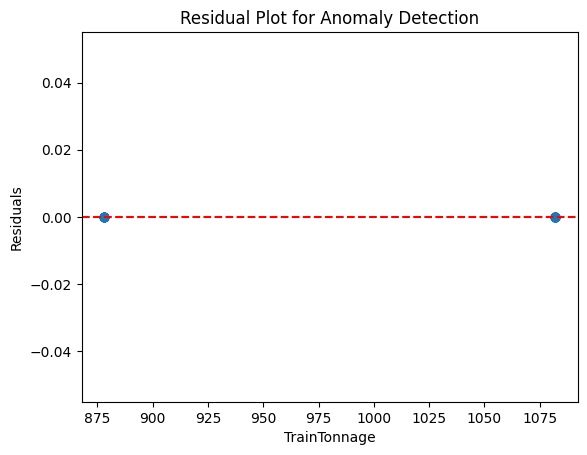

In [203]:
# Create a residual plot
residuals = y_test - y_pred
plt.scatter(X_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('TrainTonnage')
plt.ylabel('Residuals')
plt.title('Residual Plot for Anomaly Detection')
plt.show()


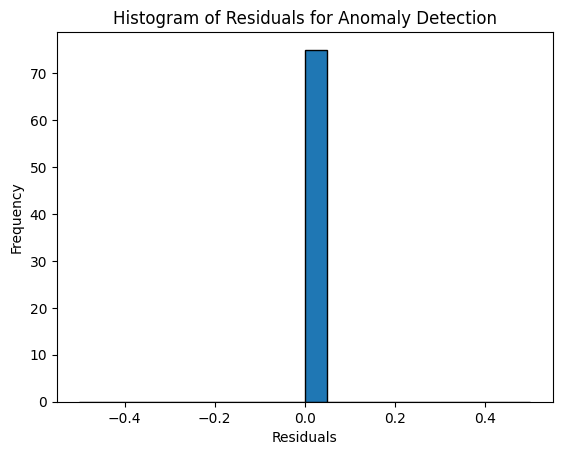

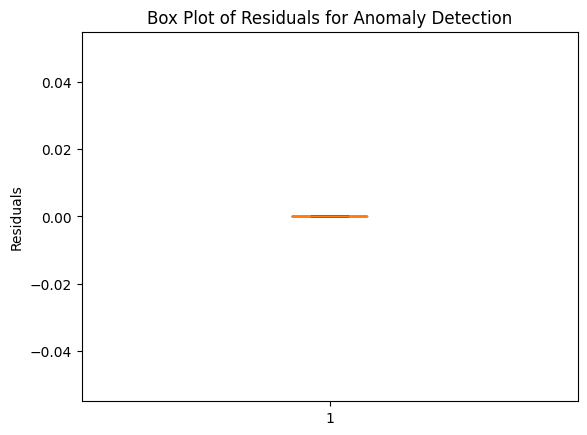

In [204]:
# Create a histogram of residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Anomaly Detection')
plt.show()

# Create a box plot of residuals
plt.boxplot(residuals)
plt.ylabel('Residuals')
plt.title('Box Plot of Residuals for Anomaly Detection')
plt.show()


In [205]:
# Add an outlier to the dataset
outlier = pd.DataFrame({'TrainTonnage': [1000], 'TrainTonnage': [1000]})
df = df.append(outlier, ignore_index=True)


/tmp/ipykernel_1620/2269059117.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(outlier, ignore_index=True)


In [206]:
# Generate synthetic anomalies
num_anomalies = 10 # Change these values to update the graphs below 
synthetic_anomalies = pd.DataFrame({'TrainTonnage': np.random.normal(5000, 1000, num_anomalies)})
df = df.append(synthetic_anomalies, ignore_index=True)

/tmp/ipykernel_1620/2052523793.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_anomalies, ignore_index=True)


In [207]:
# Modify existing data points to create anomalies
df.loc[df.index == 5, 'TrainTonnage'] = 10000  # Modify the 6th data point to be an anomaly
#df.loc[df.index == 100, 'TrainTonnage'] = 99999  # Modify the 6th data point to be an anomaly
#df.loc[df.index == 200, 'TrainTonnage'] = 102  # Modify the 6th data point to be an anomaly


In [208]:
# Step 11: Preprocess the data with anomalies
#df = df.dropna()

In [209]:
# Instantiate the random forest regressor
X = df[['TrainTonnage']]
y = df['TrainTonnage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [210]:
# Fit the model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [211]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [212]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("\nStep 14: Model Evaluation with Anomalies")
print('Mean squared error:', mse)


Step 14: Model Evaluation with Anomalies
Mean squared error: 0.0


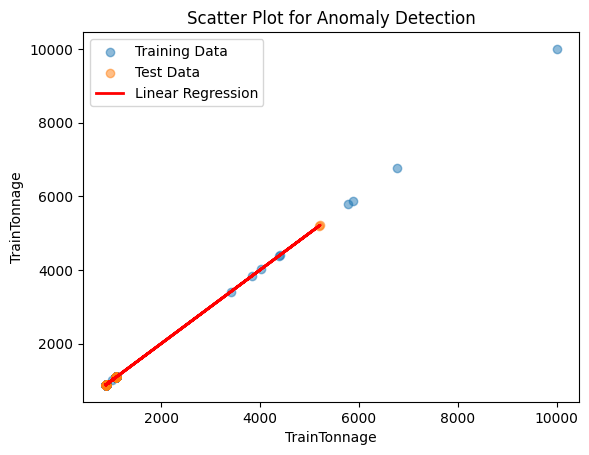

In [213]:
# Create a scatter plot of the data
plt.scatter(X_train, y_train, label='Training Data', alpha=0.5)
plt.scatter(X_test, y_test, label='Test Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('TrainTonnage')
plt.ylabel('TrainTonnage')
plt.legend()
plt.title('Scatter Plot for Anomaly Detection')
plt.show()


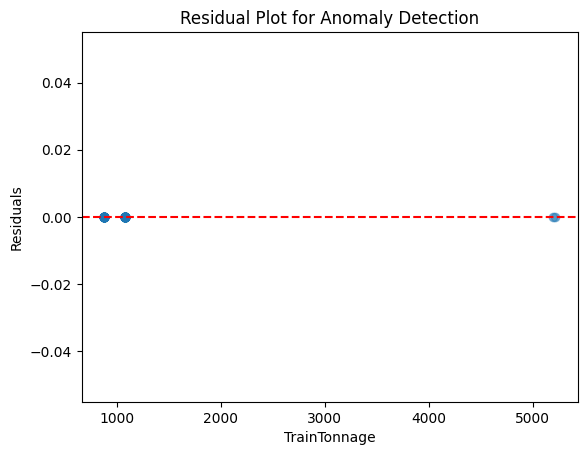

In [214]:
# Create a residual plot
residuals = y_test - y_pred
plt.scatter(X_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('TrainTonnage')
plt.ylabel('Residuals')
plt.title('Residual Plot for Anomaly Detection')
plt.show()


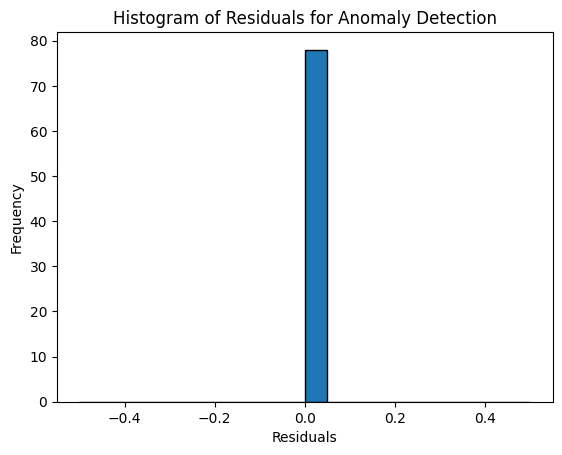

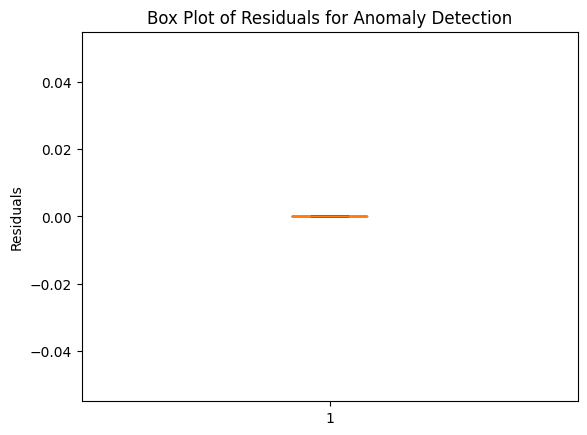

In [215]:
# Create a histogram of residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Anomaly Detection')
plt.show()

# Create a box plot of residuals
plt.boxplot(residuals)
plt.ylabel('Residuals')
plt.title('Box Plot of Residuals for Anomaly Detection')
plt.show()